In [1]:
%matplotlib inline

import keras
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os

Using TensorFlow backend.


In [2]:
model = keras.models.load_model('Models/prototype')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
x_train = np.load('Models/x_train.npy')
x_val = np.load('Models/x_val.npy')
y_train = np.load('Models/y_train.npy')
y_val = np.load('Models/y_val.npy')

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 128)         204928    
__________

In [5]:
dict([(layer.name, layer) for layer in model.layers[0:]])

{'conv2d_1': <keras.layers.convolutional.Conv2D at 0x13d63bcc0>,
 'activation_1': <keras.layers.core.Activation at 0x13d6611d0>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x13d661240>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x13d6dba90>,
 'activation_2': <keras.layers.core.Activation at 0x13d7090f0>,
 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D at 0x13d709080>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x13d720048>,
 'activation_3': <keras.layers.core.Activation at 0x13d720fd0>,
 'flatten_1': <keras.layers.core.Flatten at 0x13d720ba8>,
 'dense_1': <keras.layers.core.Dense at 0x13d6dba20>,
 'activation_4': <keras.layers.core.Activation at 0x13d75acf8>,
 'dense_2': <keras.layers.core.Dense at 0x13d75a748>,
 'activation_5': <keras.layers.core.Activation at 0x13d77eef0>}

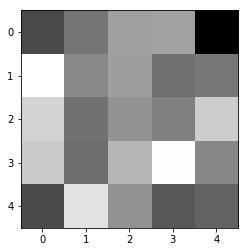

In [6]:
plt.imshow(model.layers[6].get_weights()[0][:,:,1,:][:,:,1], cmap='gray')

In [7]:
filters = model.layers[6].get_weights()[0][:,:,:,:][:,:,:]

In [8]:
def visualize_filters(filters, row, col, channel=0, figsize=(5,5)):
    fig, axes = plt.subplots(row, col, figsize=figsize)
    index = 0
    
    for i in range(row):
        for j in range(col):
            # filters[row, col, channel,filters index][rowm,col,filter index]
            axes[i, j].imshow(filters[:,:,channel,:][:,:,index], cmap='gray')
            index += 1
    
    plt.show()

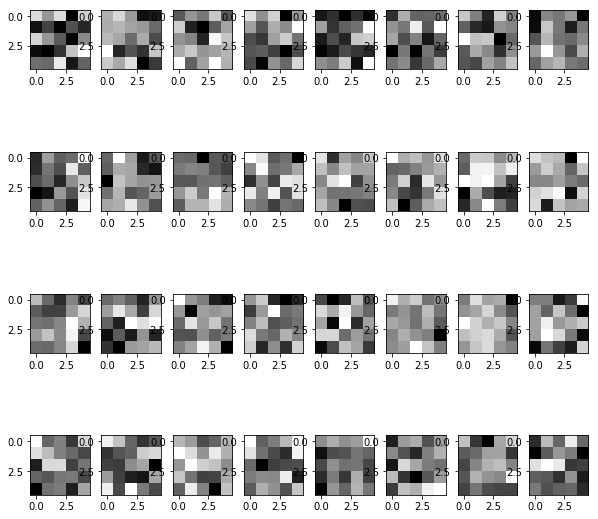

In [9]:
visualize_filters(filters,4,8,channel=0,figsize=(10,10))

In [10]:
def visualize_activations(image_index, layer=0, row=4, col=8):
    activations = Model(inputs=model.input, outputs=model.layers[layer].output)
    fig, axes = plt.subplots(row, col, figsize=(10,10))

    index = 0
    for i in range(row):
        for j in range(col):
            image = activations.predict(x_val[image_index:image_index+1])[0,:,:,index]
            axes[i][j].imshow(image, cmap='gray')
            index += 1
    plt.show()

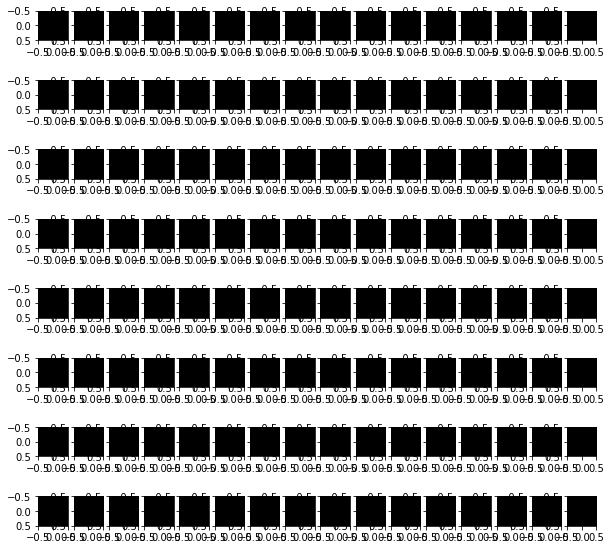

In [21]:
visualize_activations(image_index=1, layer=7, row=8, col=16)

In [14]:
def visualize_images(data, labels, predict, start=0, cols=4, rows=4, size=10, fontsize=10):
    fig = plt.figure(figsize=(size, size))
    plt.subplots_adjust(bottom=.05, top=.95, hspace=.9)
    
    cols = cols
    rows = rows
    for i in range(1, cols * rows + 1):
        img = data[start - 1 + i]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
        
        pred = label_names[predict[start - 1+ i]]
        real = label_names[int(np.where(labels[start - 1 + i] == 1)[0])]
        plt.title('Predict: ' + pred + '\n Real Label: ' + real, fontsize=fontsize)
    plt.show()

In [16]:
y_pred = model.predict_classes(x_val)

In [18]:
label_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
    ]

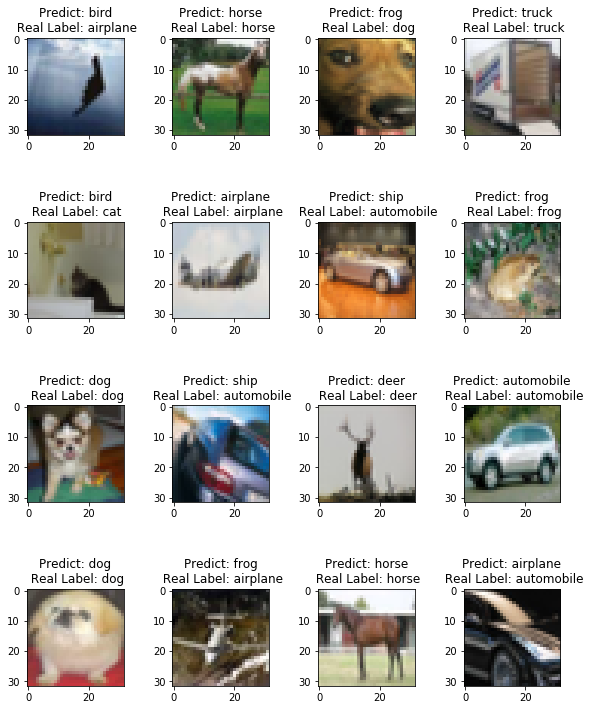

In [19]:
visualize_images(x_val, y_val, y_pred, start=0, fontsize=12)

In [31]:
test_m = Model(inputs=model.input, outputs=model.layers[5].output)

In [32]:
test_m.predict(x_val[1:1+1]).shape[0:]

(1, 5, 5, 64)

In [35]:
model.layers[6].output

<tf.Tensor 'conv2d_3/BiasAdd:0' shape=(?, 1, 1, 128) dtype=float32>